## Source of inspiration

Many sources about that, pointing all to https://course.fast.ai/

This is version 5 of this course.

## Lesson 1

https://course.fast.ai/Lessons/lesson1.html

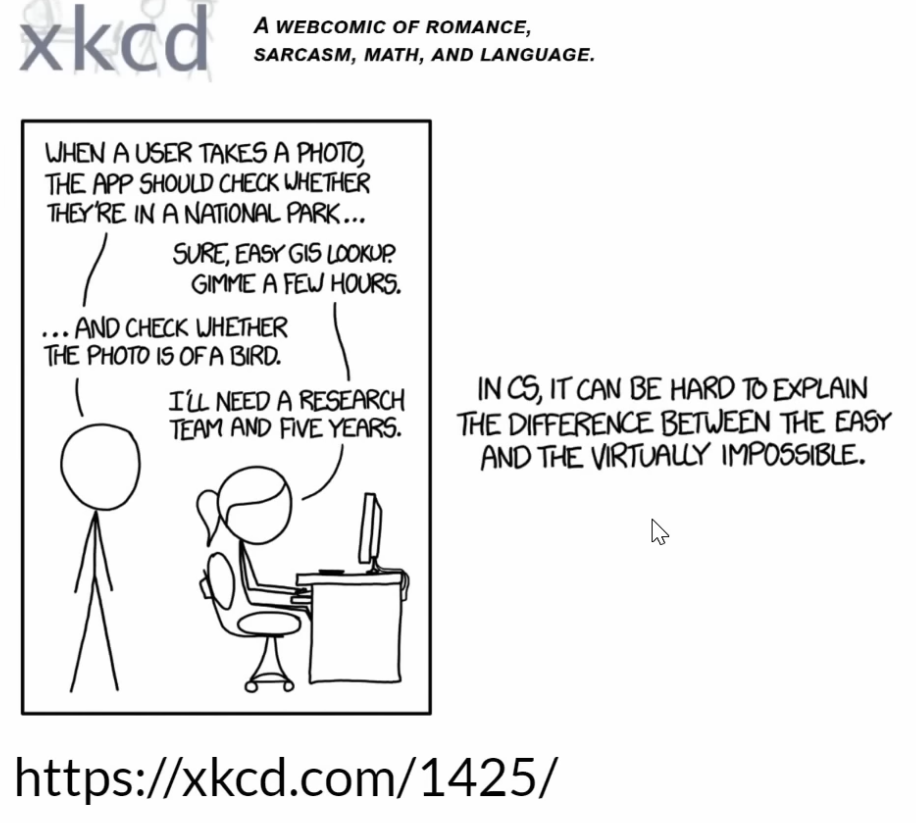

In 2015, nearly impossible to recognize a bird with CS. And Jeremy doing that in 2 minutes ;)

After this brief demonstration, Jeremy shared what he remmbers about recent progress in AI such s :
- Dall-e, midjourney to create images from text
- Google Pathways Language Model (PaLM) to explain jokes or run mathematical proof